In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False

## 数据获取


In [ ]:
dt=pd.read_csv('train.csv')
dt2=pd.read_csv('test.csv')
dt.head()
dt.info()
dt.describe()

# StandardHours Over18

#### 数据检查


In [ ]:
dt.isnull().sum()       # 有无缺失值
dt.duplicated().sum()   # 有无重复
dt.columns

In [ ]:
dt['Attrition'].hist()
# plt.figure(figsize=(8, 6))
# plt.pie(dt, labels='Attrition', autopct='%1.1f%%', startangle=90)
# plt.title('单变量分布饼图')
# plt.axis('equal')

## 数据处理


In [ ]:
# 筛选非数字的数据  Over18
for c in dt.columns:
    if dt[c].dtype == object:
        print(f'{c}:{dt[c].unique()}')

In [ ]:
# StandardHours Over18
dt['Over18'].hist()     # 单变量分析
# dt['StandardHours'].hist()     # 单变量分析
plt.show()

#### 数据清洗

In [ ]:
train_dt=dt.drop(['EmployeeNumber','StandardHours','Over18'],axis=1)
test_dt=dt2.drop(['EmployeeNumber','StandardHours','Over18'],axis=1)
train_dt.head()
# test_dt.head()

In [ ]:
sns.kdeplot(data = dt[dt['Attrition']==1], x='Age',label = 'Attr')
sns.kdeplot(data = dt[dt['Attrition']==0], x='Age',label = 'not')
plt.grid(True)
plt.legend(loc='best')

#### 数据拆分


In [ ]:
x=train_dt.drop('Attrition',axis=1)
x_test=test_dt.drop('Attrition',axis=1)
y=train_dt['Attrition']
y_test=test_dt['Attrition']

)#### 特征工程

In [ ]:
# 字符串转数字
le=LabelEncoder()
y=le.fit_transform(y)
y_test=le.fit_transform(y_test)

In [ ]:
for i in x.columns:
    if x[i].dtype==object:
        x[i]=le.fit_transform(x[i])
for i in x_test.columns:
    if x_test[i].dtype==object:
        x_test[i]=le.fit_transform(x_test[i])

## 探索性数据分析

In [ ]:
# 画图


## 模型构建

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor, XGBClassifier

param_grid={
    'n_estimators': [10, 20,50,100,150,200] ,# 正则化强度
    'learning_rate':[0.1,0.5,1]}

model=XGBClassifier()
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=4)
grid_search.fit(x,y)
# y_pred=grid_search.predict(x_test)
print(grid_search.best_params_)
bmodel=grid_search.best_estimator_

In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_proba=bmodel.predict_proba(x_test)[:,1]
r_a=roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {r_a:.4f}")

## 绘图

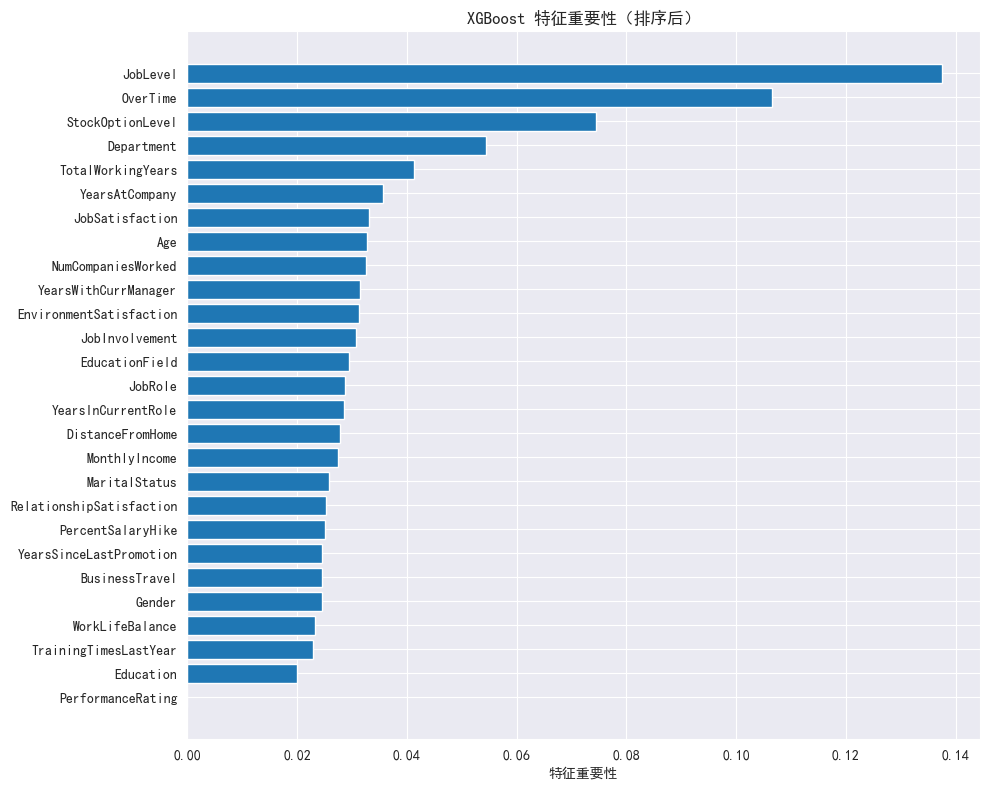

In [255]:
feature_importance = pd.DataFrame({
    'feature': bmodel.feature_names_in_,
    'importance': bmodel.feature_importances_
})

# 按重要性排序
feature_importance = feature_importance.sort_values('importance', ascending=True)

# 绘制水平条形图
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('特征重要性')
plt.title('XGBoost 特征重要性（排序后）')
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix = .corr()

# 绘制热力图
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,        # 显示数值
            fmt=".2f",         # 数值格式
            cmap='coolwarm',   # 颜色方案
            center=0,          # 颜色中心点
            square=True,       # 正方形单元格
            cbar_kws={"shrink": .8})  # 颜色条大小

plt.title('特征相关性热力图', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()